In [81]:
import cv2
import yt_dlp
import numpy as np
import time
import matplotlib.pyplot as plt

In [82]:
urls = ["https://www.youtube.com/live/HsLvnFQW_yM?si=eltOk2O69icwtRF1"]

In [83]:
ydl_opts = {'format': 'best[ext=mp4]', 'quiet': True,} #best video quality, mp4 file, suppress console output
ydl = yt_dlp.YoutubeDL(ydl_opts)

In [84]:
url = urls[0]

info_dict = ydl.extract_info(url, download=False)
video_url = info_dict.get("url")

In [ ]:
count = 0
frames = []

while count < 10:
    start_time = time.time()
    
    capture = cv2.VideoCapture(video_url)
    ret, frame = capture.read()
    frames.append(frame)
    
    count += 1
    
    elapsed_time = time.time() - start_time
    remaining_time = max(0, 1 - elapsed_time)
    print(remaining_time)
    time.sleep(remaining_time)

In [ ]:
frames = np.stack(frames, axis=0)

In [ ]:
capture.release()
cv2.destroyAllWindows()

In [132]:
import subprocess

subprocess.run([
            'ffmpeg',
            '-i', video_url,
            '-t', '10',  # Set duration to 10 seconds
            'output.mp4'
        ])


CompletedProcess(args=['ffmpeg', '-i', 'https://manifest.googlevideo.com/api/manifest/hls_playlist/expire/1699985282/ei/ImNTZZa9Dv6z6dsP1f6m-A0/ip/91.132.40.20/id/HsLvnFQW_yM.1/itag/96/source/yt_live_broadcast/requiressl/yes/ratebypass/yes/live/1/sgoap/gir%3Dyes%3Bitag%3D140/sgovp/gir%3Dyes%3Bitag%3D137/hls_chunk_host/rr5---sn-5hne6n6l.googlevideo.com/playlist_duration/30/manifest_duration/30/spc/UWF9f0vOWG333-c91WHSdi8l0VKnyq8/vprv/1/playlist_type/DVR/initcwndbps/2047500/mh/TQ/mm/44/mn/sn-5hne6n6l/ms/lva/mv/m/mvi/5/pl/22/dover/11/pacing/0/keepalive/yes/fexp/24007246/beids/24350018/mt/1699963246/sparams/expire,ei,ip,id,itag,source,requiressl,ratebypass,live,sgoap,sgovp,playlist_duration,manifest_duration,spc,vprv,playlist_type/sig/ANLwegAwRgIhAJyG5idJYJ2N5zl-_eEKpZWsw5evIGQPMinU5HIhZtlJAiEAtcgPqBLGNgTECubzmGKJocrqsG4ExnCRKbZtsBUHLa8%3D/lsparams/hls_chunk_host,initcwndbps,mh,mm,mn,ms,mv,mvi,pl/lsig/AM8Gb2swRAIgLOCP9oSTXkCYLA2OTcHGDJjhUiO5ikPXp9vrTaEEDP8CIEE5xA42Oj1LP16O9BDSkPLblcjGsZGuK

ffmpeg -i '.\Brooks Falls - Katmai National Park - Part 043.mkv' -ss 00:31:57 -to 00:32:07 -vf fps=02 brooks_falls_katmai_national_park_part_043/2_frames_per_second/medium_movement_close_range/output_%04d.png

In [133]:
subprocess.run([
            'ffmpeg',
            '-i', 'output.mp4',
            '-vf', 'fps=01',  # Set duration to 10 seconds
            'output_%04d.png'
        ])

CompletedProcess(args=['ffmpeg', '-i', 'output.mp4', '-vf', 'fps=01', 'output_%04d.png'], returncode=0)

In [110]:
cap = cv2.VideoCapture(video_url)

In [111]:
cap.set(cv2.CAP_PROP_POS_FRAMES, 30)

True

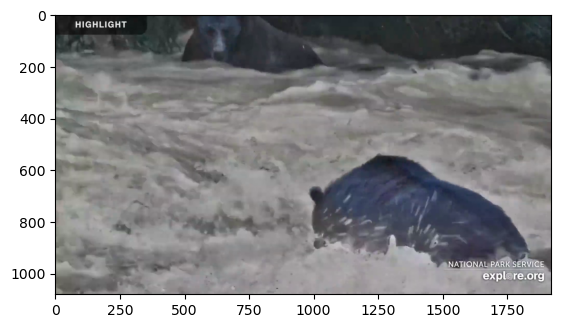

In [117]:
ret, frame = cap.read()
plt.imshow(frame)